In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
N = 1_000_000

In [3]:
data = np.random.randn(N)

In [4]:
np.mean(data) , np.median(data)

(0.0015121465155362318, 0.002387730826572747)

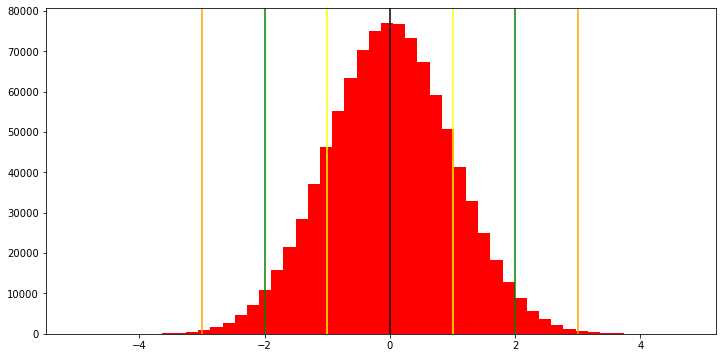

In [12]:
plt.figure(figsize=(12,6))
plt.hist(data, bins=50, color="red")
plt.axvline( np.mean(data), color="black" )
plt.axvline( np.mean(data)+np.std(data), color="yellow" ); plt.axvline( np.mean(data)-np.std(data), color="yellow" )
plt.axvline( np.mean(data)+2*np.std(data), color="green" ); plt.axvline( np.mean(data)-2*np.std(data), color="green" )
plt.axvline( np.mean(data)+3*np.std(data), color="orange" ); plt.axvline( np.mean(data)-3*np.std(data), color="orange" )
plt.show()

In [14]:
_mean = np.mean(data)
_std = np.std(data)

len(data[ (data>=_mean-_std)&(data<=_mean+_std) ]) / N * 100

68.28

In [15]:
# 2*std
len(data[ (data>=_mean-2*_std)&(data<=_mean+2*_std) ]) / N * 100

95.4563

In [16]:
# 3*std
len(data[ (data>=_mean-3*_std)&(data<=_mean+3*_std) ]) / N * 100

99.7331

In [17]:
# badanie z wykorzystaniem testy Shapiro-Wilka
from scipy.stats import shapiro

In [19]:
data = np.random.randn(4_500)
shapiro(data)

ShapiroResult(statistic=0.9990137219429016, pvalue=0.010042833164334297)

In [21]:
# podział na kwantyle (porcje danych)
# na kwartyle (na 4 częsci)
pd.qcut(data, q=4)

[(0.00523, 0.67], (0.67, 4.087], (0.67, 4.087], (-0.662, 0.00523], (-4.822, -0.662], ..., (-0.662, 0.00523], (0.00523, 0.67], (-0.662, 0.00523], (-0.662, 0.00523], (-0.662, 0.00523]]
Length: 4500
Categories (4, interval[float64, right]): [(-4.822, -0.662] < (-0.662, 0.00523] < (0.00523, 0.67] < (0.67, 4.087]]

In [24]:
df = pd.DataFrame(data)
df.describe()

,0
count,4500.000000
mean,0.000655
std,0.999804
min,-4.820940
25%,-0.662047
50%,0.005233
75%,0.670017
max,4.087454


In [26]:
df = pd.DataFrame(data)
df.describe(percentiles=[x/10 for x in range(1,10)])

,0
count,4500.000000
mean,0.000655
std,0.999804
min,-4.820940
10%,-1.256237
20%,-0.841894
30%,-0.520793
40%,-0.245336
50%,0.005233
60%,0.245884


### Korelacja

In [27]:
np.random.seed(0)
x = np.random.randint(-10, 11, 5000)
y = 2*x + np.random.randn(5000)*10

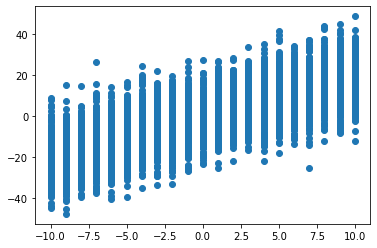

In [28]:
plt.scatter(x, y)

In [29]:
from scipy.stats import pearsonr, spearmanr

In [30]:
pearsonr(x, y), spearmanr(x,y)

((0.7635868855086893, 0.0),
 SpearmanrResult(correlation=0.7720387637016054, pvalue=0.0))

In [31]:
df = pd.DataFrame({ "x":x, "y":y})
df

,x,y
0,2,8.029931
1,5,29.111195
2,-10,-25.759701
3,-7,-21.759662
4,-7,-13.749474
...,...,...
4995,-6,-12.988602
4996,1,5.995345
4997,5,-4.511550
4998,-1,-4.596051


In [32]:
df.corr()

,x,y
x,1.000000,0.763587
y,0.763587,1.000000
